## Cnn Model for cat and dog prediction


In [1]:
#importing libraries
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
#Loading Api from kaggle for dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
#Downloading data from kaggle
!kaggle datasets download -d tongpython/cat-and-dog

 87% 190M/218M [00:00<00:00, 284MB/s]
100% 218M/218M [00:00<00:00, 271MB/s]


In [4]:
#As data downloaded in zip file we need to unzip it
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

**Data Preprocessing**

In [5]:
#Preprocessing the Training set
#Here size of image is reduced to 64x64, batch of images is kept as 32 and class is defined as 'binary'.
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/training_set/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [ ]:
#Preprocessing the Test set
#Applying same scale as training set, but only feature scaling is applied. image augmentation is avoided to prevent leakage of testing data.
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/test_set/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

In [7]:
#Initialising the CNN
cnn = tf.keras.models.Sequential()
#STEP 1: ADDING CONVOLUTIONAL LAYER
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
#STEP 2: APPLYING MAX POLLING
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
#Note that in image augmentation we kept the image size as 64x64, therefore input_shape should also be same [64,64,3] (here 3 signifies that this is a colorful image (R,G,B))
#Activation function relu is applied to decrease any linearity that might have arrised while applying filters.
#Adding 2nd Convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
#STEP 3: FLATTENING
cnn.add(tf.keras.layers.Flatten())
#STEP 4: FULL CONNECTION
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
#STEP 5: OUTPUT LAYER
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#lets check summary
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

* As we can see it gonna train 813,217 parameters

**Training the CNN**

In [8]:
#Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs =18)

Epoch 1/18
251/251 [==============================] - 47s 122ms/step - loss: 0.6630 - accuracy: 0.5958 - val_loss: 0.6841 - val_accuracy: 0.6100
Epoch 2/18
251/251 [==============================] - 30s 120ms/step - loss: 0.5900 - accuracy: 0.6874 - val_loss: 0.5638 - val_accuracy: 0.7098
Epoch 3/18
251/251 [==============================] - 31s 124ms/step - loss: 0.5532 - accuracy: 0.7154 - val_loss: 0.5401 - val_accuracy: 0.7321
Epoch 4/18
251/251 [==============================] - 31s 123ms/step - loss: 0.5176 - accuracy: 0.7429 - val_loss: 0.5380 - val_accuracy: 0.7296
Epoch 5/18
251/251 [==============================] - 30s 120ms/step - loss: 0.4974 - accuracy: 0.7540 - val_loss: 0.4953 - val_accuracy: 0.7687
Epoch 6/18
251/251 [==============================] - 30s 121ms/step - loss: 0.4780 - accuracy: 0.7680 - val_loss: 0.4801 - val_accuracy: 0.7795
Epoch 7/18
251/251 [==============================] - 31s 123ms/step - loss: 0.4624 - accuracy: 0.7794 - val_loss: 0.4671 - val_ac

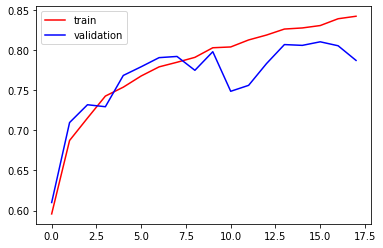

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

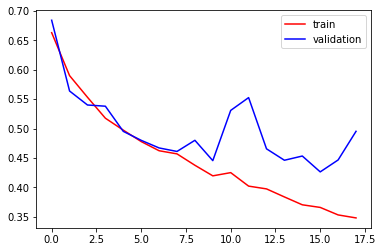

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

* Lets do Some predictions

In [11]:
#Lets create function for predicting image
from keras.preprocessing import image
def predict_image(img_path):
  test_image = image.load_img(img_path, target_size = (64, 64))
  test_image = image.img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis = 0)
  img = image.load_img(img_path,target_size= (300,300))
  result = cnn.predict(test_image)
  training_set.class_indices
  if result[0][0] == 1:
    prediction = 'dog'
    print(f'This image is {prediction}')
    return img   
  else:
    prediction = 'cat'
    print(f'This image is {prediction}')
    return img 

This image is cat


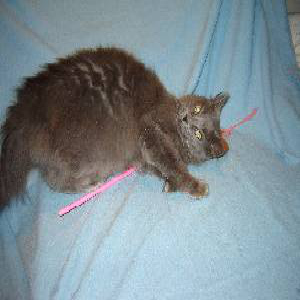

In [12]:
#Lets check images from the dataset only
predict_image('/content/test_set/test_set/cats/cat.4016.jpg')

This image is cat


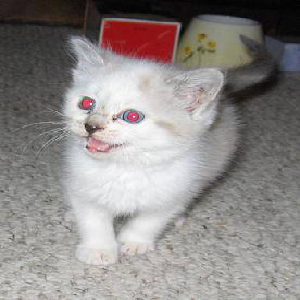

In [13]:
predict_image('/content/test_set/test_set/cats/cat.4018.jpg')

This image is dog


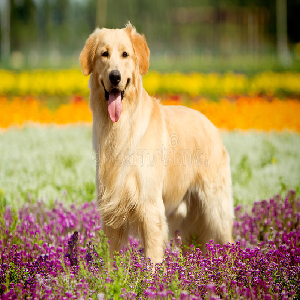

In [14]:
#Random image from google checking prediction
predict_image('/content/golden-retriever.jpg')

This image is cat


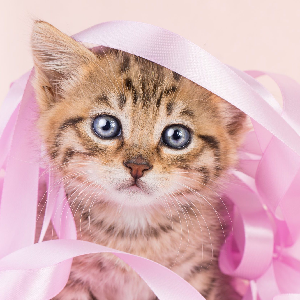

In [15]:
#Random image
predict_image('/content/GettyImages-988013222-scaled-e1618857975729.jpg')